# Basic Libraries

In [5]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Model Building
#### ResNet50 model with no top:
The top layer has 1000 classes. But here I have only two classes. First one is for Light and the second one is for Speaker. I've replaced thousand nodes with two nodes having the activation of softmax.

In [6]:
num_classes=2
resnetWeightsPath= "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
#this is no top resnet50 weights
model=Sequential()
model.add(ResNet50(include_top=False,pooling='avg',weights=resnetWeightsPath))
# it's a must to use include_top = False as I have used the weights that don't have any top weights.
model.add(Dense(num_classes,activation='softmax'))
model.layers[0].trainable = False 
#this layer is the Resnet50 layer
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Train and Validation Generator
### *file distribution*
it's the tricky part. Even if you don't understand the code thoroughly but keep the files as it should be for other classes it will work perfectly.

![this is how it should be oriented](fileDistribution.jpg)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
image_size=224
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = data_generator.flow_from_directory('speaker_and_light/train',target_size=(image_size,image_size),batch_size=24,class_mode='categorical')
validation_generator = data_generator.flow_from_directory('speaker_and_light/val',target_size=(image_size,image_size),batch_size=20,class_mode='categorical')
model.fit_generator(train_generator,steps_per_epoch=3,epochs=10,validation_data=validation_generator,validation_steps=1)

Found 82 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/10
3/3 [==============================] - 40s 13s/step - loss: 0.1382 - acc: 0.9560 - val_loss: 0.0905 - val_acc: 0.9500
Epoch 2/10
3/3 [==============================] - 41s 14s/step - loss: 0.1098 - acc: 0.9722 - val_loss: 0.0646 - val_acc: 1.0000
Epoch 3/10
3/3 [==============================] - 38s 13s/step - loss: 0.0844 - acc: 0.9853 - val_loss: 0.0668 - val_acc: 1.0000
Epoch 4/10
3/3 [==============================] - 33s 11s/step - loss: 0.1089 - acc: 0.9853 - val_loss: 0.0839 - val_acc: 0.9500
Epoch 5/10
3/3 [==============================] - 34s 11s/step - loss: 0.0648 - acc: 1.0000 - val_loss: 0.0764 - val_acc: 0.9500
Epoch 6/10
3/3 [==============================] - 44s 15s/step - loss: 0.1129 - acc: 0.9722 - val_loss: 0.0418 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 35s 12s/step - loss: 0.0623 - acc: 1.0000 - val_loss: 0.0414 - val_acc: 1.0000
Epoch 8/10
3/3 [=

# Checking on other Photos
let's see some photos of speaker and light and how our system predicts them. I've included the percentage also.

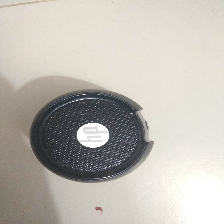

SPEAKER 99.3958592414856  percent


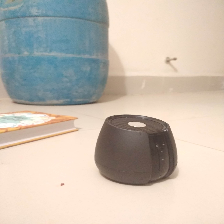

SPEAKER 92.1518623828888  percent


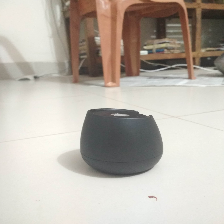

SPEAKER 91.52592420578003  percent


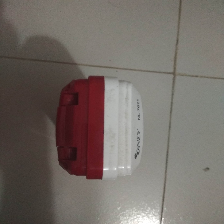

LIGHT  72.41593599319458  percent


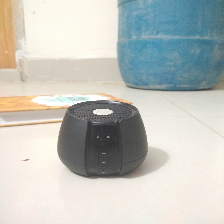

SPEAKER 98.44239354133606  percent


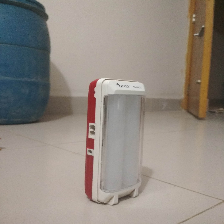

LIGHT  59.24670100212097  percent


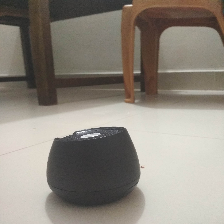

SPEAKER 79.52314019203186  percent


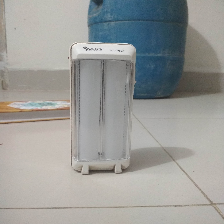

LIGHT  83.59031081199646  percent


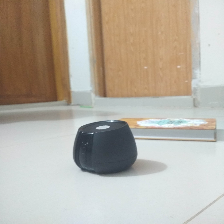

SPEAKER 90.18864035606384  percent


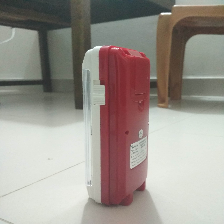

LIGHT  91.28558039665222  percent


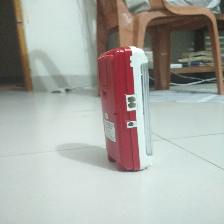

LIGHT  55.53373098373413  percent


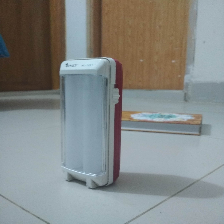

LIGHT  96.13029360771179  percent


In [10]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

import os
checkList=os.listdir('check')
# test data set folder name = check
checkList=[os.path.join('check',i) for i in checkList ]

from IPython import display
for i in range(len(checkList)):
    display.display(load_img(checkList[i],target_size=(224,224)))
    pred = model.predict(np.array(load_img(checkList[i],target_size=(224,224))).reshape(1,224,224,3))
    # reshape(numOfPhotos,imageHeight,imageWidth,Dimension)
    if pred[0][0]>pred[0][1]: # first class for light second class for speaker
        print('LIGHT ',pred[0][0]*100,' percent')
    else:
        print('SPEAKER',pred[0][1]*100,' percent')
    